# Data wrangling
This is a form of data transformation.
Data transformation is changing data from one type to the other.

### Why?
- Enrich the data (Understanding what is so important about the data)
- Looking at the bigger picture (The business case or bottom line and the idea for pushing the boundries of `DS`)
- Raw data are pieced together to the format required by the `model`.
- Helps us cleaning and structure the data better.
- Helps get rid of noice from the data (Noice is the aspect of the data that contributes little to nothing to the bottom line and the business case.)
- Makes the data usable.

### Activies
- Subsetting a dataframe
- Filtering on conditions
- Grouping / Aggregating data.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'
company_data = pd.read_html(url)
df = company_data[0]
df.columns = df.columns.get_level_values(0)

In [3]:
df.rename(columns= { 'Revenue': 'Revenue ($)', 'Profit': 'Profit ($)' }, inplace= True)

In [4]:
df['Revenue ($)'] = [float(i.replace('$', '').replace(',', '')) for i in df['Revenue ($)']]

In [5]:
df['Profit ($)'] = [float(i.replace('$', '').replace(',', '')) for i in df['Profit ($)']]

In [6]:
df_subset = df.loc[[i for i in range(21)], ['Revenue ($)', 'Profit ($)']]
df_subset.head()

,Revenue ($),Profit ($)
0,648125.0,15511.0
1,574785.0,30425.0
2,545948.0,9204.0
3,494890.0,129699.0
4,429700.0,9393.0


### Summery Statistics

This shows the distribution of the data

In [7]:
df_subset.describe()

,Revenue ($),Profit ($)
count,21.000000,21.000000
mean,381249.238095,31261.714286
std,107518.022320,36216.075347
min,242290.000000,1745.000000
25%,312018.000000,8344.000000
50%,357776.000000,17945.000000
75%,421714.000000,34214.000000
max,648125.000000,129699.000000


In [8]:
df['Employees'].max()

2100000

In [9]:
employee_df = df[df['Employees'] >= 1000000]
employee_df['Employees'].describe()

count    4.000000e+00
mean     1.503181e+06
std      4.487683e+05
min      1.026301e+06
25%      1.277642e+06
50%      1.443212e+06
75%      1.668750e+06
max      2.100000e+06
Name: Employees, dtype: float64

In [10]:
employee_df['Rank']

0    1
1    2
2    3
5    6
Name: Rank, dtype: int64

In [11]:
df['Rank'].max()

50

### Grouping / Aggregation

In [12]:
df['Industry'].value_counts()

Industry
Oil and gas               8
Healthcare                8
Financials                8
Automotive                7
Retail                    5
Commodities               3
Information technology    3
Construction              3
Electronics               2
Electricity               1
Conglomerate              1
Steel                     1
Name: count, dtype: int64

<Axes: xlabel='Industry'>

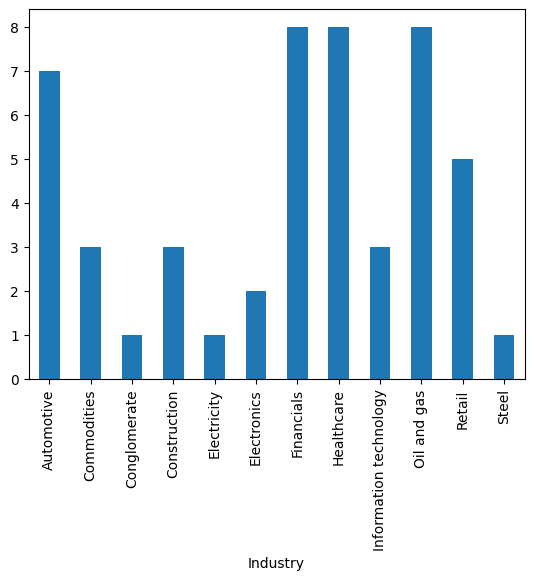

In [13]:
df.groupby('Industry')['Name'].count().plot(kind= 'bar')

# Understanding GroupBy

In [14]:
by_industry = df.groupby('Industry')

In [18]:
by_industry.groups['Oil and gas']

Index([3, 4, 5, 12, 13, 23, 25, 29], dtype='int64')

In [21]:
by_industry.get_group('Oil and gas')

,Rank,Name,Industry,Revenue ($),Profit ($),Employees,Headquarters[note 1],State-owned,Ref.
3,4,Saudi Aramco,Oil and gas,494890.0,129699.0,73311,Saudi Arabia,NaN,[6]
4,5,China Petrochemical Corporation,Oil and gas,429700.0,9393.0,513434,China,NaN,[7]
5,6,China National Petroleum Corporation,Oil and gas,421714.0,21294.0,1026301,China,NaN,[8]
12,13,ExxonMobil,Oil and gas,344582.0,36010.0,61500,United States,NaN,[16]
13,14,Shell,Oil and gas,323183.0,19359.0,103000,United Kingdom,NaN,[17]
23,24,TotalEnergies,Oil and gas,218945.0,21384.0,102579,France,NaN,[27]
25,26,BP,Oil and gas,213032.0,15239.0,79400,United Kingdom,NaN,[29]
29,30,Chevron,Oil and gas,200949.0,21369.0,45600,United States,NaN,[33]


In [24]:
animal_df = pd.DataFrame({ 'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'], 'Max Speed': [380.0, 370.0, 24.0, 26.0]})

In [25]:
animal_groupBy = animal_df.groupby('Animal')

In [27]:
animal_groupBy['Max Speed'].mean()

Animal
Falcon    375.0
Parrot     25.0
Name: Max Speed, dtype: float64

# Missing Data & Data Imputation

### Types of missing data
- Missing Completely at random (Missing by Design)
- Missing at random
- Missing not at random

In [29]:
titanic_df = pd.read_csv('./../../../data/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# Subset the data
titanic_df_subset = titanic_df.loc[:100]
titanic_df_subset.shape

(101, 12)

# Data that is missing completely at random

In [34]:
titanic_df_subset.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            22
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          80
Embarked        1
dtype: int64

In [41]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# Dealing with missing data

In [53]:
# Complete case analysis - Deletion - Omit the cases with missing data and analyse the remaining data.
# Omit columms with missing data

titanic_df_subset_1 = titanic_df_subset[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Fare']]
titanic_df_subset_1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [52]:
# Available case analysis - Deletion - Only the missing observations are ignored, and analysis is done on the variables present


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [68]:
# Dropping missing values
titanic_df_subset_2 = titanic_df_subset.copy()
titanic_df_subset_2.drop(columns=['Cabin'], inplace=True, axis= 1)
titanic_df_subset_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data Imputation (Retaining Data)
With statistical estimates (Mean, Median, Mode)

Mean, Median, Mode are measures of central tendency.(The center of the data)

Mean is influenced by outliers.

In [71]:
titanic_df_subset_3 = titanic_df_subset.copy()
titanic_df_subset_3['Age'].describe()


count    79.000000
mean     27.472532
std      15.180740
min       0.830000
25%      18.500000
50%      26.000000
75%      34.500000
max      71.000000
Name: Age, dtype: float64

In [74]:
mode_age = titanic_df_subset_3.Age.mode().mean()
mode_age

26.0

In [76]:
titanic_df_subset_3.Age.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [77]:
titanic_df_subset_3.Age.fillna(titanic_df_subset_3.Age.mean()).head(20)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     27.472532
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    27.472532
18    31.000000
19    27.472532
Name: Age, dtype: float64

# Retain all data for data analysis

### Last observation carried forward
This uses the last observed value to replace the next missing value
`Note`: To be used when data is missing by design.

In [79]:
titanic_df_subset_3.Age.ffill().head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     2.0
18    31.0
19    31.0
Name: Age, dtype: float64

### Next observation carried backward
This uses the next observed value to replace the last missing value
`Note`: To be used when data is missing by design.

In [80]:
titanic_df_subset_3.Age.bfill().head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     54.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    31.0
18    31.0
19    35.0
Name: Age, dtype: float64

Linear Interpolation

In [83]:
s = pd.Series([0, 1, np.nan, 3])

In [84]:
s

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64

In [85]:
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [92]:
titanic_df_subset_3.Age.interpolate().head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     44.5
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    16.5
18    31.0
19    33.0
Name: Age, dtype: float64

# Outliers
These are extreme data or data points that do not follow normal patterns

In [93]:
list_salaries = [12000, 20000, 14000, 15000]

In [94]:
np.mean(list_salaries)

15250.0

In [95]:
list_salaries = [12000, 20000, 14000, 15000, 1000000] # with outlier

In [96]:
np.mean(list_salaries)
# The mean is greater than all the items except the outlier.

212200.0

# The tukey's rule.
This is a situation where we create boundaries and in these boundaries we are creating Interquartile range rule.

<Axes: xlabel='Age'>

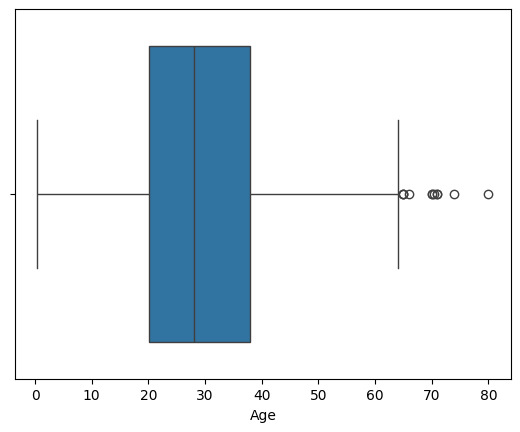

In [98]:
sns.boxplot(data= titanic_df, x= 'Age') # Box plot

In [100]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [118]:
[x for x in titanic_df.Age if x < 1]

[0.83, 0.92, 0.75, 0.75, 0.67, 0.42, 0.83]

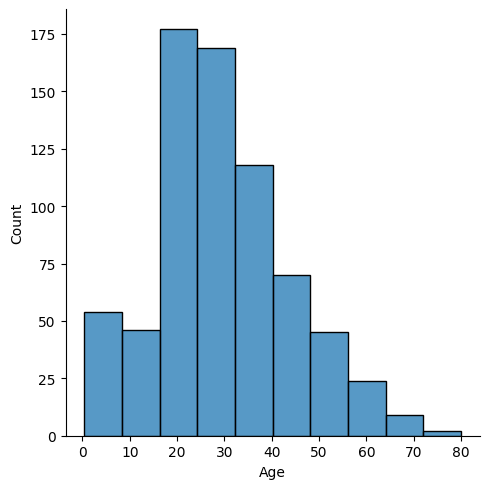

In [104]:
sns.displot(data= titanic_df, x= 'Age', bins= 10, kde= False) # Distribution plot

<Axes: xlabel='Age', ylabel='Fare'>

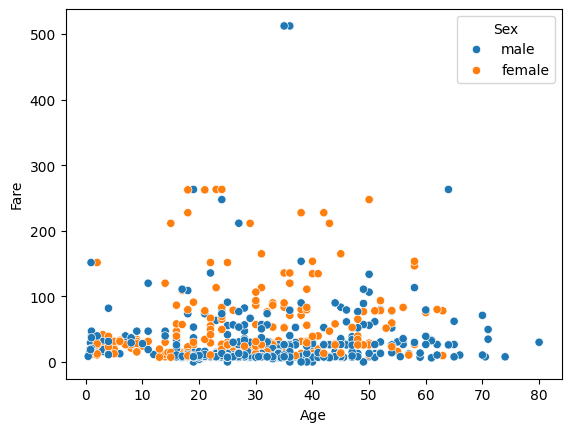

In [106]:
sns.scatterplot(data= titanic_df, x= 'Age', y= 'Fare', hue= 'Sex')

In [107]:
titanic_df.shape

(891, 12)

In [108]:
# Tukey's Rule
# Q1 - 1.5 * IQR (Lower limit)
# Q3 + 1.5 * IQR (Upper limit)

In [109]:
Q1 = titanic_df.Age.quantile(.25)
Q3 = titanic_df.Age.quantile(.75)

IQR = Q3 - Q1


In [110]:
IQR

17.875

In [120]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [121]:
(lower_limit, upper_limit)

(-6.6875, 64.8125)

In [117]:
titanic_df.Age.min()

0.42

In [136]:
upper_outlier = titanic_df.Age > upper_limit

In [135]:
upper_outlier

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [137]:
titanic_df[~(upper_outlier)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
